# Independent current/voltage sources


This paper has been created through collaboration with:

Amir Parsa Hosseini Kakhk

Contact address: seyedamirparsa.hosseinikakhk@mail.um.ac.ir

# Introduction
A voltage source is a device that provides a constant or varying electric potential difference between its terminals. A current source is a device that provides a constant or varying electric current through its terminals. Both voltage and current sources are essential for powering various electrical circuits and devices.

However, not all sources are the same. Depending on how they behave and interact with other circuit elements, sources can be classified into two main categories: independent and dependent.

![energy-sources](./images/independent-and-dependent-sources.jpg)



Here we want to talk about the independent category.

# What is an Independent Voltage or Current Source?
An independent source is defined as a source that does not rely on any other quantity in the circuit. Its output voltage or current is set by its own characteristics and remains unchanged regardless of the load or other circuit conditions.

An independent voltage source is defined as a two terminal active element that is capable of supplying and maintaining the same voltage, (v) across its terminals regardless of the current, (i) flowing through it. In other words, independent voltage sources will supply a constant voltage at all times regardless of the value of the current being supplied producing an I-V characteristic represented by a straight line.

An independent current source continually provides a specified amount of current regardless of the impedance that it is driving and as such, an independent current source could, in theory, supply an infinite amount of energy.

Ideal independent current sources are typically used to solve circuit theorems and for circuit analysis techniques for circuits that containing real active elements. The simplest form of a current source is a resistor in series with a voltage source creating currents ranging from a few milli-amperes to many hundreds of amperes. Remember that a zero-value current source is an open circuit as R = 0.

To sum up an independent voltage source maintains a specified voltage across its terminals regardless of the current flowing through it. An independent current source maintains a specified current through its terminals regardless of the voltage across it.

The independent voltage sources may be classified into the following two types:
## Constant Voltage Sources
The constant voltage sources, also called time-invariant voltage sources, are those independent voltage sources whose output voltage remains constant throughout their operation. Examples of constant independent voltage sources are cells, batteries, and many other direct voltage sources.

## Time Variant Voltage Sources
The types of independent voltage sources whose output voltage changes with time are known as time-variant independent voltage sources. Although, it is important to note that the change in the output voltage of the time-variant independent voltage source does not occur due to change in the voltage or current of any other part of the circuit. But, it only changes with time. Examples of time-variant voltage sources are alternator (AC generator).


Similar to independent voltage sources, the independent current sources are also classified into two types:
## Constant Current Source
An independent current sources whose output current remains constant throughout its operation is known as a constant independent current source. It is also known as timeinvariant current source.

## Time-Variant Current Source
An independent current source whose output current changes time is referred to as a timevariant independent current source. Here, it must note that the output current does not change due to variation in voltage or current in any other part of the circuit, but it only changes with time.

The symbols used to represent independent sources are shown below. The arrow inside the circle indicates the direction of the current for current sources and the polarity of the voltage for voltage sources.

![independent-voltage-current-source-image](./images/independent-voltage-current-source.png) 



## characteristic curve of Independent voltage and current sources
If we assume that our voltage source is ideal which means it has zero internal resistance, then its graph will look like this:

![Ideal-Voltage-Source.png](./images/Ideal-Voltage-Source.png)

If we assume that our current source is ideal which means it has infinite internal resistance, then its graph will look like this:

![Ideal-Current-Source.png](./images/Ideal-Current-Source.png)

## Analysis of circuits with different values 
### **1. circuit with 2 independent voltage sources:**

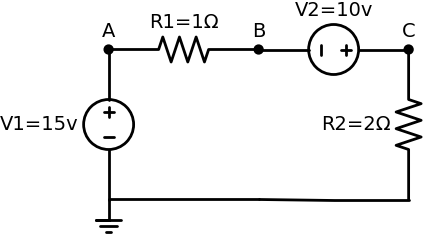

In [1]:
import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing():
    elm.Ground()
    elm.SourceV().label('V1=15v')
    elm.Dot().label('A')
    elm.Resistor().right().label('R1=1Ω')
    elm.Dot().label('B')
    elm.SourceV().right().label('V2=10v')
    elm.Dot().label('C')
    elm.Resistor().down().label('R2=2Ω')
    elm.Line().left()
    elm.Line()

#### pyspice analysis:

Now we analyze this circuit to show that the voltage through the circuit is independent of the elements of the circuit.

In [1]:
import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()

from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

circuit = Circuit('Independent Voltage Sources')

circuit.V(1, 'A', circuit.gnd, 15@u_V)  # V1 = 15V
circuit.R(1, 'A', 'B', 1@u_Ω)           # R1 = 1Ω
circuit.V(2, 'C', 'B', 10@u_V)          # V2 = 10V
circuit.R(2, 'C', circuit.gnd, 2@u_Ω)   # R2 = 2Ω

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.operating_point()

voltage_A = float(analysis['A'][0])
voltage_B = float(analysis['B'][0])
voltage_C = float(analysis['C'][0])

print(f"Voltage at Node A (V1 output): {voltage_A:.2f} V")
print(f"Voltage at Node B (between V1 and V2): {voltage_B:.2f} V")
print(f"Voltage at Node C (V2 output): {voltage_C:.2f} V")

Voltage at Node A (V1 output): 15.00 V
Voltage at Node B (between V1 and V2): 6.67 V
Voltage at Node C (V2 output): 16.67 V


#### Change The Load
Now we change the values of the elements of the circuit:

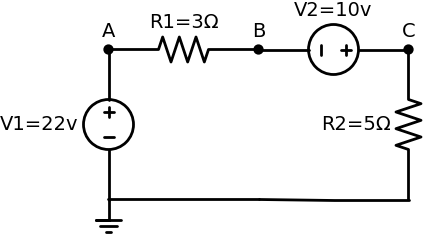

In [1]:
import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing():
    elm.Ground()
    elm.SourceV().label('V1=22v')
    elm.Dot().label('A')
    elm.Resistor().right().label('R1=3Ω')
    elm.Dot().label('B')
    elm.SourceV().right().label('V2=10v')
    elm.Dot().label('C')
    elm.Resistor().down().label('R2=5Ω')
    elm.Line().left()
    elm.Line()

In [3]:
import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()

from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

circuit = Circuit('Independent Voltage Sources')

circuit.V(1, 'A', circuit.gnd, 22@u_V)  # V1 = 22V
circuit.R(1, 'A', 'B', 3@u_Ω)           # R1 = 3Ω
circuit.V(2, 'C', 'B', 10@u_V)          # V2 = 10V
circuit.R(2, 'C', circuit.gnd, 5@u_Ω)   # R2 = 5Ω

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.operating_point()

voltage_A = float(analysis['A'][0])
voltage_B = float(analysis['B'][0])
voltage_C = float(analysis['C'][0])

print(f"Voltage at Node A (V1 output): {voltage_A:.2f} V")
print(f"Voltage at Node B (between V1 and V2): {voltage_B:.2f} V")
print(f"Voltage at Node C (V2 output): {voltage_C:.2f} V")

Voltage at Node A (V1 output): 22.00 V
Voltage at Node B (between V1 and V2): 10.00 V
Voltage at Node C (V2 output): 20.00 V


#### **conclusion**
As you can see, although we changed the values of the resistors and the V1 voltage source, the voltage difference between the two ends of the V2 voltage source is constant and has not changed. This indicates that the voltage source is independent.

### **2. circuit with 2 independent current sources:**

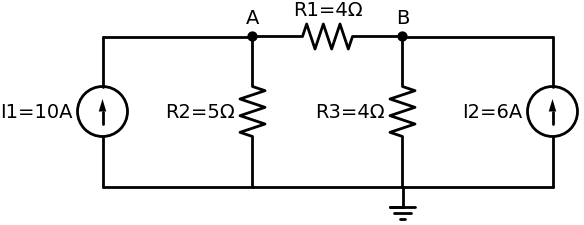

In [4]:
import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing():
    v = elm.SourceI().up().label('I1=10A')
    l1 = elm.Line().right()
    elm.Dot().label('A')
    elm.Resistor().right().label('R1=4Ω')
    elm.Dot().label('B')
    l2 = elm.Line().right()
    
    elm.Line().at(v.start).right()
    l3 = elm.Line().right()
    elm.Ground()
    l4 = elm.Line().right()
    elm.SourceI().label('I2=6A')

    elm.Resistor().endpoints(l1.end, l3.start).label('R2=5Ω')
    elm.Resistor().endpoints(l2.start, l4.start).label('R3=4Ω')


#### pyspice analysis:

In [9]:
import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

circuit = Circuit('Circuit with Voltage and Current Source')
circuit.I(1, circuit.gnd, 'A', 10@u_A)  
circuit.I(2, circuit.gnd, 'B', 6@u_A)  
circuit.R(1, 'A', 'B', 4@u_Ohm)          # R1 = 4Ω
circuit.R(2, 'A', circuit.gnd, 5@u_Ohm)  # R2 = 5Ω
circuit.R(3, 'B', circuit.gnd, 4@u_Ohm)  # R3 = 4Ω (parallel with R2)

for resistance in (circuit.I1, circuit.I2):
  resistance.plus.add_current_probe(circuit)

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.operating_point()
  
for branch in analysis.branches.values():
  print('Branch {}: {:5.2f} A'.format(str(branch), float(branch[0])))
  

Branch vi1_plus: 10.00 A
Branch vi2_plus:  6.00 A


#### Change The Load
Now we change the values of the elements of the circuit:

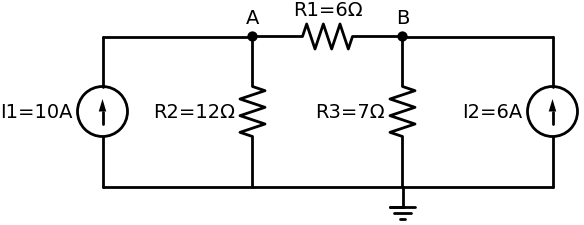

In [10]:
import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing():
    v = elm.SourceI().up().label('I1=10A')
    l1 = elm.Line().right()
    elm.Dot().label('A')
    elm.Resistor().right().label('R1=6Ω')
    elm.Dot().label('B')
    l2 = elm.Line().right()
    
    elm.Line().at(v.start).right()
    l3 = elm.Line().right()
    elm.Ground()
    l4 = elm.Line().right()
    elm.SourceI().label('I2=6A')

    elm.Resistor().endpoints(l1.end, l3.start).label('R2=12Ω')
    elm.Resistor().endpoints(l2.start, l4.start).label('R3=7Ω')


#### pyspice analysis:

In [11]:
import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

circuit = Circuit('Circuit with Voltage and Current Source')
circuit.I(1, circuit.gnd, 'A', 10@u_A)  
circuit.I(2, circuit.gnd, 'B', 6@u_A)  
circuit.R(1, 'A', 'B', 6@u_Ohm)          # R1 = 6Ω
circuit.R(2, 'A', circuit.gnd, 12@u_Ohm)  # R2 = 12Ω
circuit.R(3, 'B', circuit.gnd, 7@u_Ohm)  # R3 = 7Ω (parallel with R2)

for resistance in (circuit.I1, circuit.I2):
  resistance.plus.add_current_probe(circuit)

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.operating_point()
  
for branch in analysis.branches.values():
  print('Branch {}: {:5.2f} A'.format(str(branch), float(branch[0])))
  

Branch vi1_plus: 10.00 A
Branch vi2_plus:  6.00 A


#### **conclusion**
This time you can see eventhough we changed the values of the resistors, the current of the branches are constant and has not changed. This indicates that the current source is independent.

### **3. circuit with one independent voltage source and one independent current source:**

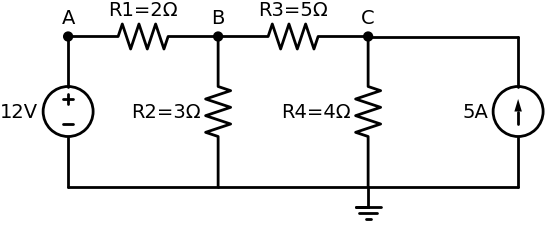

In [12]:
import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing() as d:
    v = elm.SourceV().up().label('12V')
    elm.Dot().label('A')
    elm.Resistor().right().label('R1=2Ω')
    elm.Dot().label('B')

    r1 = elm.Resistor().right().label('R3=5Ω')
    elm.Dot().label('C')
    l2 = elm.Line().right()
    
    elm.Line().at(v.start).right()
    l3 = elm.Line().right()
    elm.Ground()
    l4 = elm.Line().right()
    elm.SourceI().label('5A')

    elm.Resistor().endpoints(r1.start, l3.start).label('R2=3Ω')
    elm.Resistor().endpoints(l2.start, l4.start).label('R4=4Ω')
    


#### pyspice analysis:

In [13]:
import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

circuit = Circuit('Circuit with Voltage and Current Source')
circuit.V(1, 'A', circuit.gnd, 12@u_V)  # 12V voltage source
circuit.I(1, circuit.gnd, 'C', 5@u_A)  # 5A current source
circuit.R(1, 'A', 'B', 2@u_Ω)  # R1 = 2Ω
circuit.R(2, 'B', circuit.gnd, 3@u_Ω)  # R2 = 3Ω
circuit.R(3, 'B', 'C', 5@u_Ω)  # R3 = 5Ω 
circuit.R(4, 'C', circuit.gnd, 4@u_Ω)  # R3 = 4Ω 

for resistance in (circuit.R1, circuit.I1):
  resistance.plus.add_current_probe(circuit)
  
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.operating_point()

for branch in analysis.branches.values():
  print('Branch {}: {:5.2f} A'.format(str(branch), float(branch[0])))



Branch v1: -1.65 A
Branch vr1_plus:  1.65 A
Branch vi1_plus:  5.00 A


#### Change The Load
Now we change the values of the elements of the circuit:


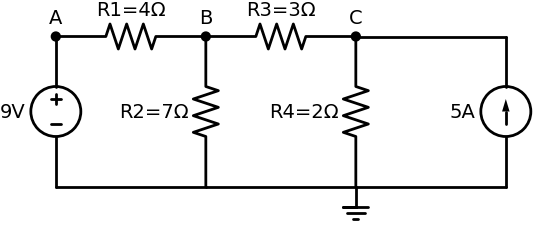

In [2]:
import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing() as d:
    v = elm.SourceV().up().label('9V')
    elm.Dot().label('A')
    elm.Resistor().right().label('R1=4Ω')
    elm.Dot().label('B')

    r1 = elm.Resistor().right().label('R3=3Ω')
    elm.Dot().label('C')
    l2 = elm.Line().right()
    
    elm.Line().at(v.start).right()
    l3 = elm.Line().right()
    elm.Ground()
    l4 = elm.Line().right()
    elm.SourceI().label('5A')

    elm.Resistor().endpoints(r1.start, l3.start).label('R2=7Ω')
    elm.Resistor().endpoints(l2.start, l4.start).label('R4=2Ω')
    

In [3]:
import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

circuit = Circuit('Circuit with Voltage and Current Source')
circuit.V(1, 'A', circuit.gnd, 9@u_V)  # 9V voltage source
circuit.I(1, circuit.gnd, 'C', 5@u_A)  # 5A current source
circuit.R(1, 'A', 'B', 4@u_Ω)  # R1 = 4Ω
circuit.R(2, 'B', circuit.gnd, 7@u_Ω)  # R2 = 7Ω
circuit.R(3, 'B', 'C', 3@u_Ω)  # R3 = 3Ω 
circuit.R(4, 'C', circuit.gnd, 2@u_Ω)  # R3 = 2Ω 

for resistance in (circuit.R1, circuit.I1):
  resistance.plus.add_current_probe(circuit)
  
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.operating_point()

for branch in analysis.branches.values():
  print('Branch {}: {:5.2f} A'.format(str(branch), float(branch[0])))

Branch v1: -0.46 A
Branch vr1_plus:  0.46 A
Branch vi1_plus:  5.00 A


#### **conclusion**
Just like last conclusion, you can see eventhough we changed the values of the resistors and the voltage source, the current of the branch containing the current source is constant and has not changed. This indicates that the current source is independent.

# Resources
https://www.tutorialspoint.com/independent-and-dependent-voltage-and-current-sources

https://www.electrical4u.com/ideal-dependent-independent-voltage-current-source/#:~:text=Independent%20Current%20Source%3A%20Maintains%20a,used%20for%20simplifying%20circuit%20analysis.

https://www.electronics-tutorials.ws/dccircuits/current-source.html

https://www.electronics-tutorials.ws/dccircuits/voltage-source.html


